This analysis uses the Heart Disease Prediction dataset from Kaggle for the model development.

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

#Get the file name from the uploaded dictionary
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(df)

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv
     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0 

In [2]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual styles
sns.set(style="whitegrid")

In [4]:
# Check for missing values

print("Missing Values:\n", df.isnull().sum())

# Select only numerical columns for imputation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Fill missing values in numerical columns with their means
numerical_df = numerical_df.fillna(numerical_df.mean())

# Replace the original numerical columns with the imputed values
df[numerical_df.columns] = numerical_df

# Join the imputed numerical columns back with the original DataFrame
df = df.drop(numerical_df.columns, axis=1).join(numerical_df)


# Check for illogical values
illogical_values = df[(df['Age'] < 0)]
print("Illogical Values:\n", illogical_values)

Missing Values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
Illogical Values:
 Empty DataFrame
Columns: [Heart Disease, Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium]
Index: []


In [5]:
print(df.columns)

Index(['Heart Disease', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')


In [25]:
#check the data types of all columns
print(df.dtypes)

Heart Disease              float64
Age                        float64
Sex                        float64
Chest pain type            float64
BP                         float64
Cholesterol                float64
FBS over 120               float64
EKG results                float64
Max HR                     float64
Exercise angina            float64
ST depression              float64
Slope of ST                float64
Number of vessels fluro    float64
Thallium                   float64
dtype: object


The code below is used to check if there are missing values for categorical columns.

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# List of columns that should be treated as categorical
categorical_like_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

# Step 1: Convert categorical-like columns to integers or strings (for proper categorical treatment)
for col in categorical_like_cols:
    df[col] = df[col].astype('category')

# Step 2: Imputation for numerical columns (excluding categorical-like columns)
numerical_cols = df.select_dtypes(include=['float64']).columns.difference(categorical_like_cols)
numerical_imputer = SimpleImputer(strategy='median')  # Change to 'mean' if needed
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Step 3: Imputation for categorical-like columns using most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_like_cols] = categorical_imputer.fit_transform(df[categorical_like_cols])

# KNN Imputation for numerical data
knn_imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

print("Missing values have been imputed successfully.")


Missing values have been imputed successfully.


I want to check if there are any remaining missing values in my dataset.

In [30]:
# Check if there are any remaining missing values
print(df.isnull().sum())


Heart Disease              0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64


The results above show that all the missing values in my dataset have been successfully imputed, as there are no remaining missing values.

In [31]:
# View the first few rows of the imputed dataset
print(df.head())


   Heart Disease   Age  Sex  Chest pain type     BP  Cholesterol  \
0            1.0  70.0    1                4  130.0        322.0   
1            0.0  67.0    0                3  115.0        564.0   
2            1.0  57.0    1                2  124.0        261.0   
3            0.0  64.0    1                4  128.0        263.0   
4            0.0  74.0    0                2  120.0        269.0   

   FBS over 120  EKG results  Max HR  Exercise angina  ST depression  \
0             0            2   109.0                0            2.4   
1             0            2   160.0                0            1.6   
2             0            0   141.0                0            0.3   
3             0            0   105.0                1            0.2   
4             0            2   121.0                1            0.2   

   Slope of ST  Number of vessels fluro  Thallium  
0            2                      3.0         3  
1            2                      0.0         7  
2 

My dataset looks well-structured and the missing values have been successfully imputed.

Selecting numerical data for scaling is important in machine learning algorithms because of how the algorithms handle feature magnitudes. Some algorithms rely on the distances between data points or gradient-based optimization techniques. If features have vastly different scales, the algorithm may give more importance to the features with larger values, potentially leading to poor performance. Scaling ensures all features are on a similar scale, allowing the algorithm to treat them equally.

In [6]:
# Select numerical features for scaling
numerical_features = df.select_dtypes(include=['float', 'int']).columns
X = df[numerical_features]  # Features
y = df['Heart Disease']


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to training data and transform it
X_scaled = scaler.fit_transform(X)

# use X_scaled in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Together, initialization and training are essential for building a machine learning model that can learn from data, optimize its performance and make accurate predictions on new inputs

In [7]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.80


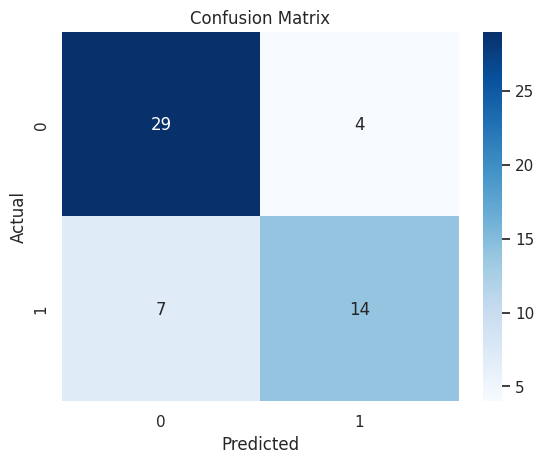

              precision    recall  f1-score   support

     Absence       0.81      0.88      0.84        33
    Presence       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred))


The Accuracy of the Random Forest model is 80% which means that 80% of the predictions made by the model are correct. It performed better at predicting Absence cases, with precision of 0.81, recall of 0.588, and an F1-score of 0.84, compared to Presence cases, which have a lower precision og 0.78, recal of 0.67, and an F1-score of 0.72. The macro average F1-score of 0.78 shows that the model's performance is relatively ballanced across both classes,, but the Presence class has a lower recall, meaning the model is missing 33% of the actual presence cases. To improve performance, especially for presence detection, I performed Hyperparameter tuning below.

Missing values in the data:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy after hyperparameter tuning: 0.8519
              precision    recall  f1-score   support

     Absence       0.84      0.94      0.89        33
    Presence       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



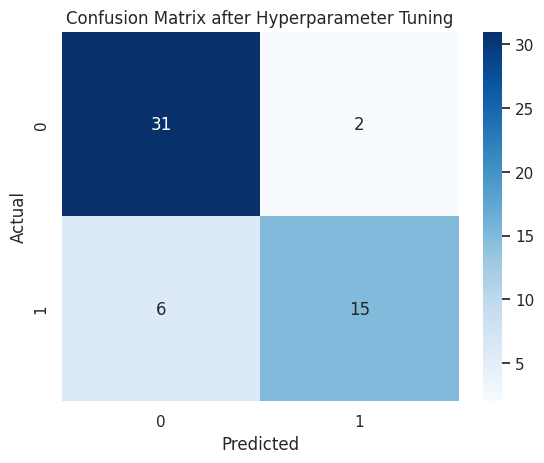

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Separate features (X) and target variable (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Check for missing values and handle them in the pandas DataFrame
print("Missing values in the data:\n", X.isnull().sum())

# Fill missing values if any
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model (RandomForestClassifier in this case)
rf_model = RandomForestClassifier(random_state=42)

# Define a smaller, more stable parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the GridSearchCV with the model and use accuracy as the scoring metric to avoid nan issues
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the best model on the scaled test data
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy after hyperparameter tuning: {accuracy_grid:.4f}")

# Print the classification report
print(classification_report(y_test, y_pred_grid))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix after Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter tuning led to a significant improvement in overall model performance, particulary for detecting the presence of the condition. Precision for the presence class increased notably from 0.78 to 0.88, while recall improved from 0.67 to 0.71, demonstrating that hyperparameter tuning was effective in enhancing the model's ability to correctly identify the condition's presence without sacrificing accuracy or performance in the absence class.

In [10]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')


Cross-Validation Accuracy: 0.81


The model achieved an average cross-validation accuracy of 81% across 5 folds, indicating that it generalizes well to different subsets of the data. this result suggests that the model is not overfitting and is likely to perform consistently with unseen data. Although slightly lower that the tuned model's test accuracy of 85.19%, the cross-validation accuracy provides reassurance that the model's performance is stable and reliable accross different splits of the dataset.

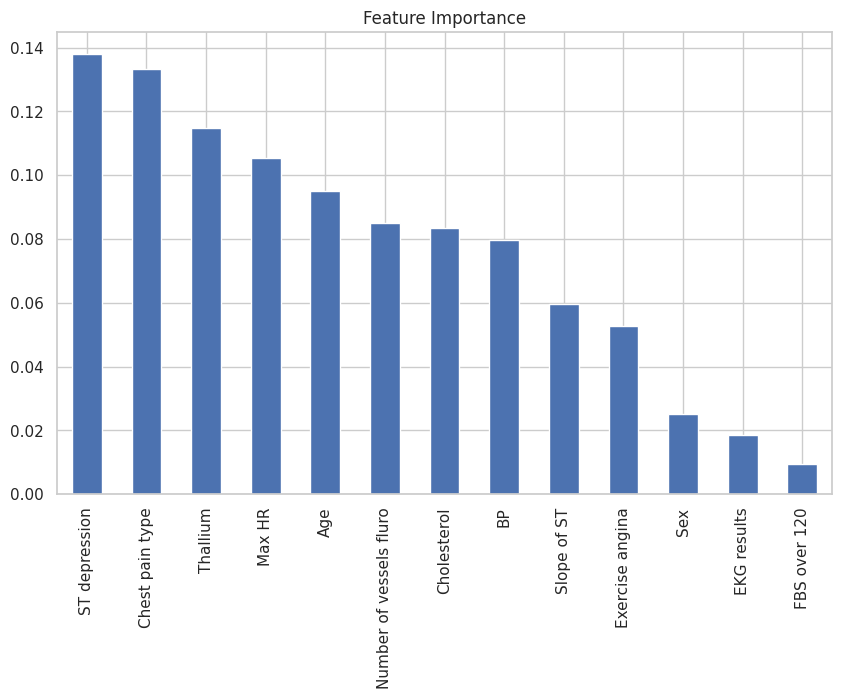

In [11]:

# Feature importance from RandomForest
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance')
plt.show()

# If a feature is determined irrelevant, drop it and retrain the model:
# X = X.drop('irrelevant_feature', axis=1)


The bar chart illustrates the feature importance in the Random Forest model, showing which variables have the most influence on the model's predictions. The top contributing features are ST depression, Chest pain type, Thallium, and Max HR, with each contributing between 12% and 14%. On the other hand, features like Exercise angina, Sex, EKG results, and FBS over 120 have lowe importance, contributing less to the predictions.

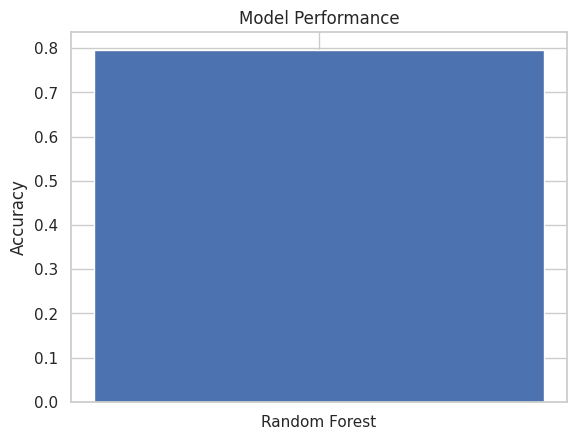

In [12]:

# Visualize model performance with a bar chart
models = ['Random Forest']
accuracies = [accuracy]

plt.bar(models, accuracies)
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.show()


In [13]:
# Print feature importances to interpret model results
important_features = feature_importances[feature_importances > 0.1]
print("Key Features influencing the model:\n", important_features)

# Summarize the model's performance metrics
print(f'Model Accuracy: {accuracy:.2f}')
print(f'Cross-Validation Score: {cv_scores.mean():.2f}')


Key Features influencing the model:
 Chest pain type    0.133470
Max HR             0.105259
ST depression      0.138002
Thallium           0.114730
dtype: float64
Model Accuracy: 0.80
Cross-Validation Score: 0.81


The key features driving the Random Forest model's prediction are  ST depression, Chest pain type, Thallium, and Max HR, with contributions ranging from 10.5% to 13.8%. These variables are the most influential in the model's decision-making process. The model achieved a solid accuracy of 80%, with a consistent cross-validation score of 81%, suggesting that the model performs reliably across different data splits and generalizes well to unseen data.

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode the target variable
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])


# Split data into training and testing sets
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Gradient Boosting (XGBoost) Accuracy: {accuracy_xgb:.4f}")

# Cross-Validation for accuracy
cv_score_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy').mean()
print(f"Cross-Validated Accuracy (XGBoost): {cv_score_xgb:.4f}")

Gradient Boosting (XGBoost) Accuracy: 0.8148
Cross-Validated Accuracy (XGBoost): 0.7815


The XGBoost model achieved an accuracy of 81.48% on the test dataset, meaning it correctly predicted approximately 81.5% of the instances. This performance indicates that the model is capturing important patterns in the data, but depending on the context, there could still be room for improvement. The cross-validated accuracy, at 78.15%, provides a more reliable measure of how the model performs on unseen data by evaluating it on multiple subsets of the dataset. The slight drop from the test accuracy suggests minor overfitting, where the model performs better on the training data than on other samples, but this difference of about 3% is not extreme.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model using accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

# Cross-Validation for accuracy
cv_score_knn = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy').mean()
print(f"Cross-Validated Accuracy (KNN): {cv_score_knn:.4f}")

K-Nearest Neighbors Accuracy: 0.6481
Cross-Validated Accuracy (KNN): 0.6815


The K-Nearest Neighbors (KNN) model achieved an accuracy of 64.81% on the test dataset, indicating that it correctly classified approximately 64.8% of the instances. The cross-validated accuracy was slightly higher at 68.15%, suggesting that the model performs more consistently across different subsets of the data. However, the overall accuracy of KNN is moderate, indicating that the model might not be capturing complex patterns in the data.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
logreg_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(random_state=42)

# List of models
models = {
    'Logistic Regression': logreg_model,
    'Support Vector Machine': svm_model,
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model,
    'XGBoost': xgb_model
}


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your feature matrix

# Evaluate each model using cross-validation
model_performance = {}

for name, model in models.items():
    # Perform 5-fold cross-validation and compute the mean accuracy
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    model_performance[name] = cv_scores.mean()
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Choose the best model based on cross-validation performance
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {model_performance[best_model_name]:.4f}")



Logistic Regression Cross-Validation Accuracy: 0.8407
Support Vector Machine Cross-Validation Accuracy: 0.8296
Random Forest Cross-Validation Accuracy: 0.8148
K-Nearest Neighbors Cross-Validation Accuracy: 0.8333
XGBoost Cross-Validation Accuracy: 0.7815

Best Model: Logistic Regression with Accuracy: 0.8407


In comparing multiple models, Logistic Regression demonstrated the highest cross-validation accuracy at 84.07%, outperforming Support Vector Machine (82.96%),Random Forest (81.48%), KNN(83.33%) and XGBoost(78.15%). Given these results, Logistic Regression is the best-performing model in this scenario, achieving the highest accuracy and demonstrating strong generalization across different data splits. Therefore, Logistic Regression is the best model for deployment.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Test Set Accuracy of the Best Model (Logistic Regression): 0.9074


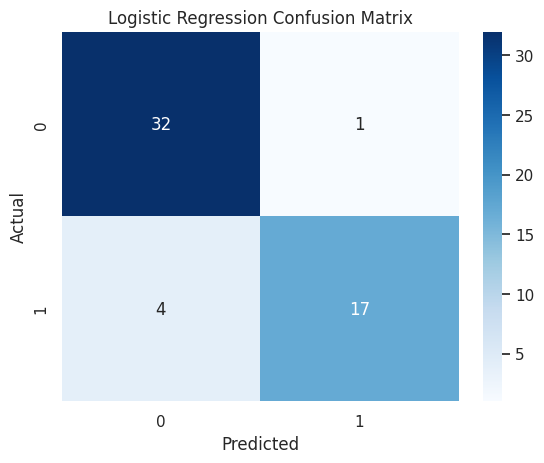

              precision    recall  f1-score   support

     Absence       0.89      0.97      0.93        33
    Presence       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [15]:
# Train the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy of the Best Model ({best_model_name}): {test_accuracy:.4f}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


The confusion matrix for the Logistic Regression model shows strong performance, with 32 true negatives and 17 true positives, indicating the model is highly accurate in correctly predicting both the absence and presence of the condition. It only made 1 false positive and 4 false negative predictions, meaning the model occasionally missed some presence cases but rarely misclassified absence cases. Overall, the model demonstrates excellent predictive power, aligning with the high accuracy and other evaluation metrics previously reported.